In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [35]:
# The code was removed by Watson Studio for sharing.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Understanding the Data

In [36]:
life_data = life_data.drop('Year', axis = 1)

In [37]:
status = pd.get_dummies(life_data.Status)

In [38]:
life_data = pd.concat([life_data, status], axis = 1)

In [39]:
life_data = life_data.drop(['Status'], axis=1)

In [40]:
life_data = life_data.groupby('Country').mean()

In [41]:
life_data.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed,Developing
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0,1
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0,1
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0,1
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0,1
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0,1


# Exploratory Data Analysis

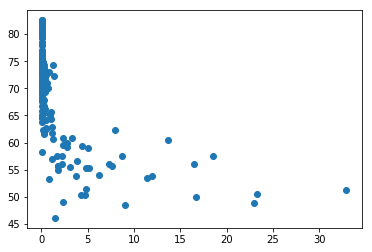

In [42]:
plt.scatter(life_data[' HIV/AIDS'], life_data['Life expectancy '])

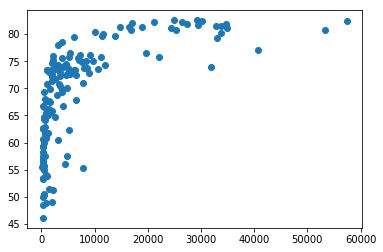

In [43]:
plt.scatter(life_data.GDP, life_data['Life expectancy '])

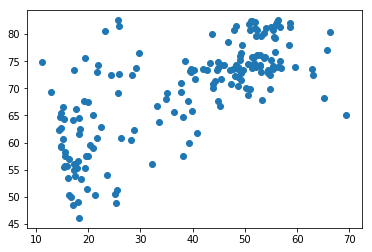

In [44]:
plt.scatter(life_data[' BMI '], life_data['Life expectancy '])

### The correlation between different columns with the prediction column can be visualised using a heat map

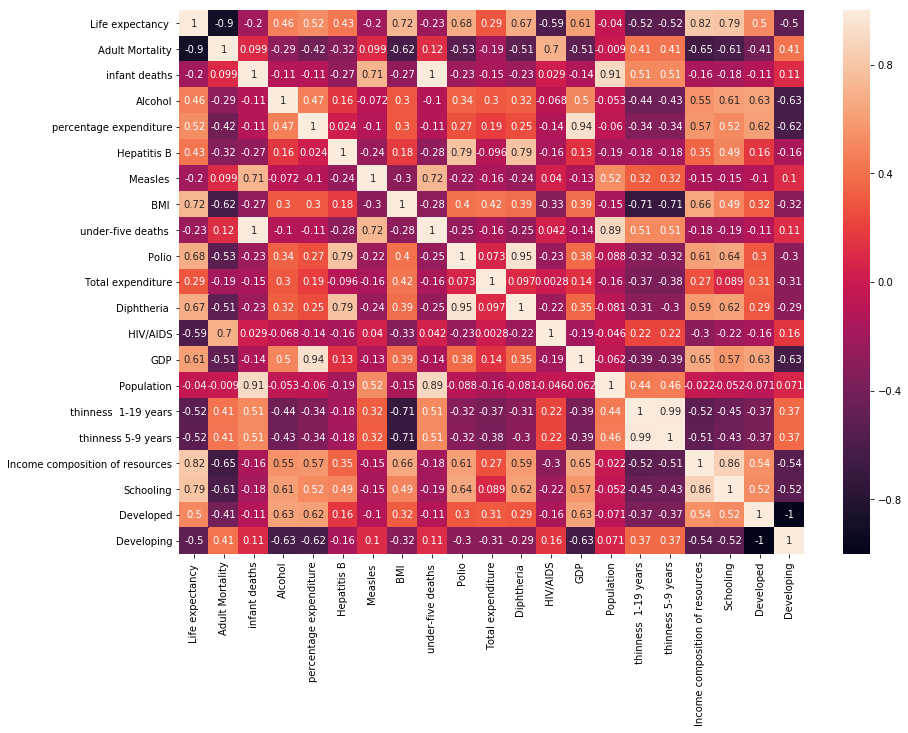

In [45]:
plt.subplots(figsize=(14,10))
ax = sns.heatmap(life_data.corr(), annot = True)

####  There is a very high correlation between thinness of 5-9 year-old and that of 1-19 year-old. Also between population and infant deaths, under 5 deaths, another is between schooling and income composition of resources. On the other hand Life expectancy and Adult Mortality are very highly negatively correlated.

# Pre Processing the Data

In [46]:
life_labels = life_data['Life expectancy ']

In [47]:
life_features = life_data.drop('Life expectancy ', axis = 1)

In [48]:
life_features.isnull().sum()

Adult Mortality                    10
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
Developing                          0
dtype: int64

In [49]:
life_labels.isnull().sum()

10

In [50]:
life_features.fillna(value = life_features.mean(), inplace = True)

In [51]:
life_labels.fillna(value = life_labels.mean(), inplace = True)

### Scaling the Dataset

In [52]:
min_max_scaler = MinMaxScaler()

In [53]:
life_features = min_max_scaler.fit_transform(life_features)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [54]:
life_features

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        4.09856519e-01, 0.00000000e+00, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        6.05739239e-01, 0.00000000e+00, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        6.34435434e-01, 0.00000000e+00, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.24516532e-01, 0.00000000e+00, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        5.59575795e-01, 0.00000000e+00, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        4.90330630e-01, 0.00000000e+00, 1.00000000e+00]])

### Splitting the data into traininig and testing set

In [55]:
life_features_train, life_features_test, life_labels_train, life_labels_test = train_test_split(life_features, life_labels, train_size = 0.7, test_size = 0.3)

# Linear Regression

In [56]:
linear_model = LinearRegression()

In [57]:
linear_model.fit(life_features_train, life_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
print('R_square score on the training: %.2f' % linear_model.score(life_features_train, life_labels_train))

R_square score on the training: 0.92


In [59]:
linear_model_predict = linear_model.predict(life_features_test)

In [60]:
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, linear_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, linear_model_predict))

Mean squared error: 5.82
Mean absolute error: 1.86
R_square score: 0.92


# GridSearchCV with Ridge Regression

In [73]:
parameters = [{'alpha':[0.01, 0.1, 1, 10, 100, 1000, 10000]}]

In [74]:
rr_model = Ridge()
Grid1 = GridSearchCV(rr_model, parameters, cv= 5)


In [75]:
Grid1.fit(life_features_train, life_labels_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100, 1000, 10000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
Grid1.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
grid_prediction = Grid1.predict(life_features_test)

In [78]:
print("Best Parameters: " + str(Grid1.best_params_))

Best Parameters: {'alpha': 0.1}


In [79]:
print("R^2 score on training data: %.2f" %Grid1.score(life_features_train, life_labels_train))
print("R^2 score: %.2f" % r2_score(life_labels_test, grid_prediction))
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, grid_prediction))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, grid_prediction))

R^2 score on training data: 0.92
R^2 score: 0.89
Mean squared error: 8.04
Mean absolute error: 2.06


# Linear Regression with Polynomial Features

In [81]:
pr = PolynomialFeatures(degree = 3, include_bias = False)

In [82]:
pr.fit(life_features_train)

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False)

In [83]:
life_features_train_poly = pr.transform(life_features_train)
life_features_test_poly = pr.transform(life_features_test)

In [84]:
poly_model = LinearRegression()

In [86]:
poly_model.fit(life_features_train_poly, life_labels_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
print("R^2 score on training data: %.2f" %poly_model.score(life_features_train_poly, life_labels_train))

R^2 score on training data: 1.00


In [88]:
poly_model_predict = poly_model.predict(life_features_test_poly)

In [89]:
print("Mean squared error: %.2f"% mean_squared_error(life_labels_test, poly_model_predict))
print("Mean absolute error: %.2f"% mean_absolute_error(life_labels_test, poly_model_predict))
print('R_square score: %.2f' % r2_score(life_labels_test, poly_model_predict))

Mean squared error: 83.68
Mean absolute error: 6.02
R_square score: -0.14


## Thus the best performing model based on the R^2 score is the first one i.e. simple Linear Regression Model and we will deploy that model to node red flow

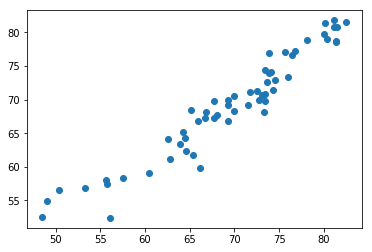

In [90]:
plt.scatter(life_labels_test, linear_model_predict)

# Watson Machine Learning Client

In [91]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-08 20:37:22,999 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [92]:
wml_credentials = {
  "apikey": "H5F50DVxhJpAfAemCV0Lsovbc2Ry10UlfVQeBn7bzNNL",
  "iam_apikey_description": "Auto-generated for key 9b5147ab-a1d2-4e00-b06a-95a111366403",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/9185774c6acf4e8a9ca1f10a3504ce36::serviceid:ServiceId-cc682288-7a6c-4953-b54f-86db87884a55",
  "instance_id": "f23a0b4f-4b38-428b-8876-853e8cc66908",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [93]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [94]:
model_props = {
    client.repository.ModelMetaNames.AUTHOR_NAME: 'Gaurav',
    client.repository.ModelMetaNames.AUTHOR_EMAIL: 'gaurav_bt2k17@dtu.ac.in',
    client.repository.ModelMetaNames.NAME: 'Life expectancy Predictor'

}

In [96]:
model_artifact = client.repository.store_model(linear_model, meta_props = model_props)

In [99]:
guid = client.repository.get_model_uid(model_artifact)
guid

'5c69ee57-9591-483d-872f-7a1ed60348b4'

In [98]:
deploy = client.deployments.create(guid, name = "Life expectancy predictor")



#######################################################################################

Synchronous deployment creation for uid: '5c69ee57-9591-483d-872f-7a1ed60348b4' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='41af2459-41f0-4a28-827b-1e9878aa237a'
------------------------------------------------------------------------------------------------




In [100]:
scoring_url = client.deployments.get_scoring_url(deploy)

In [101]:
scoring_url

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/f23a0b4f-4b38-428b-8876-853e8cc66908/deployments/41af2459-41f0-4a28-827b-1e9878aa237a/online'